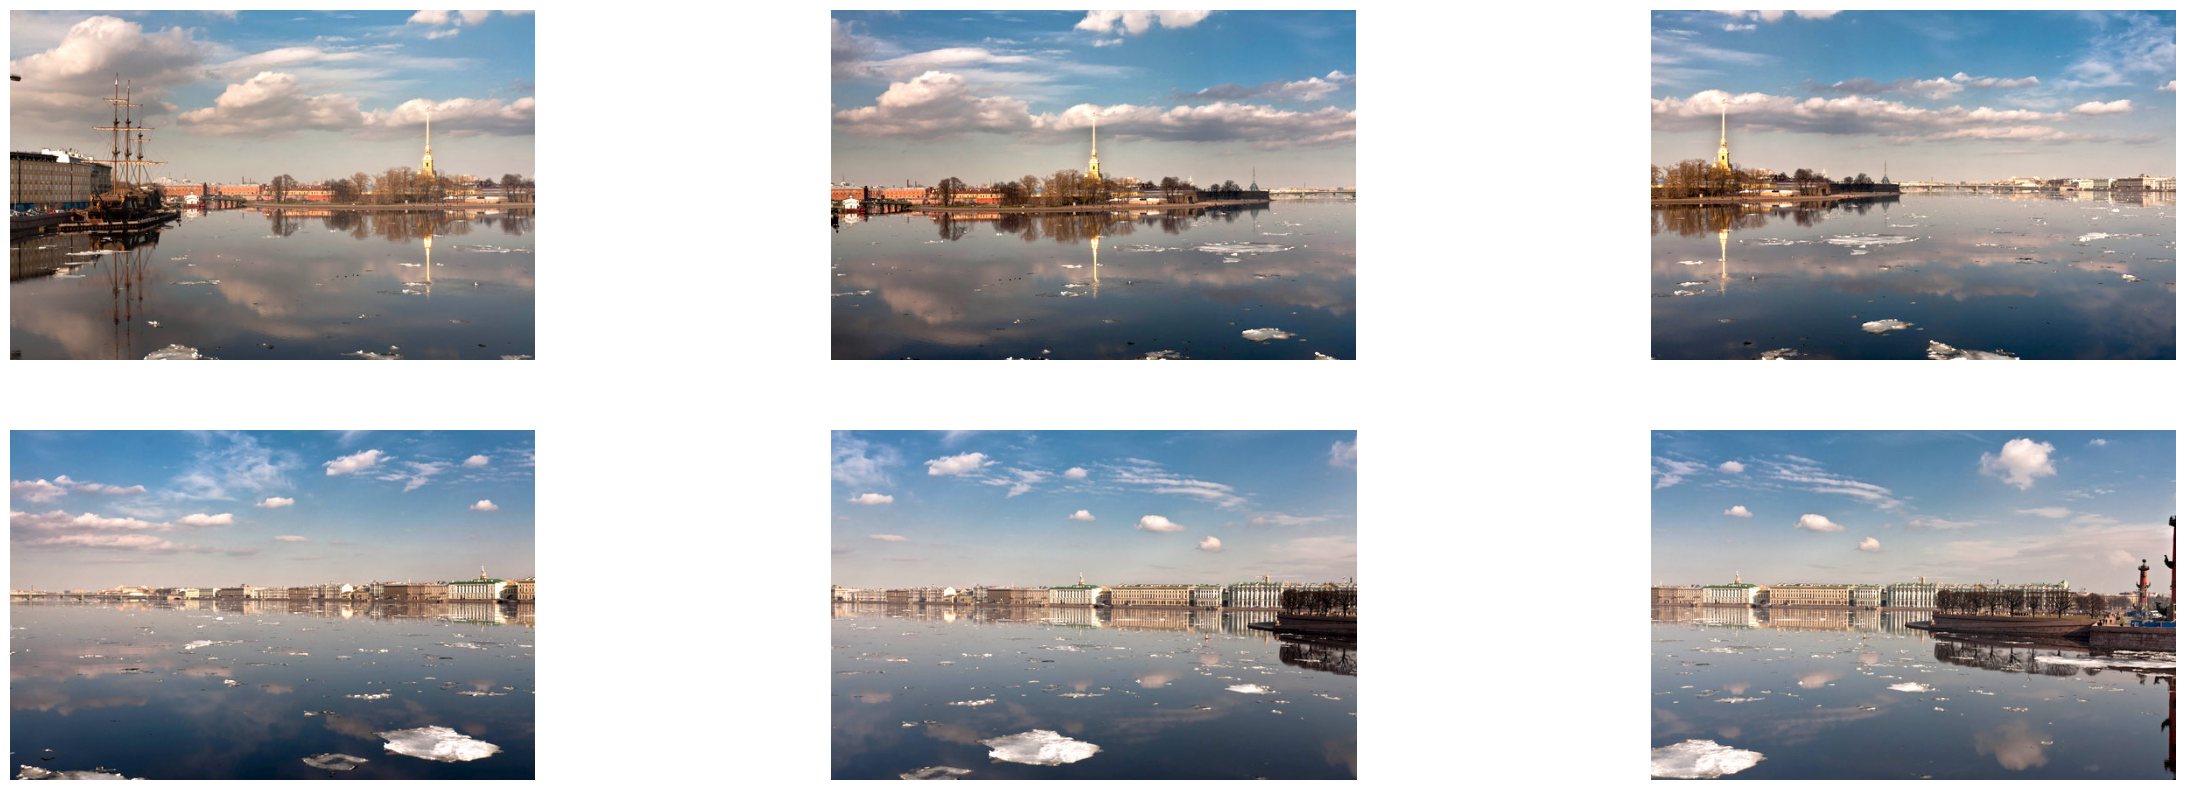

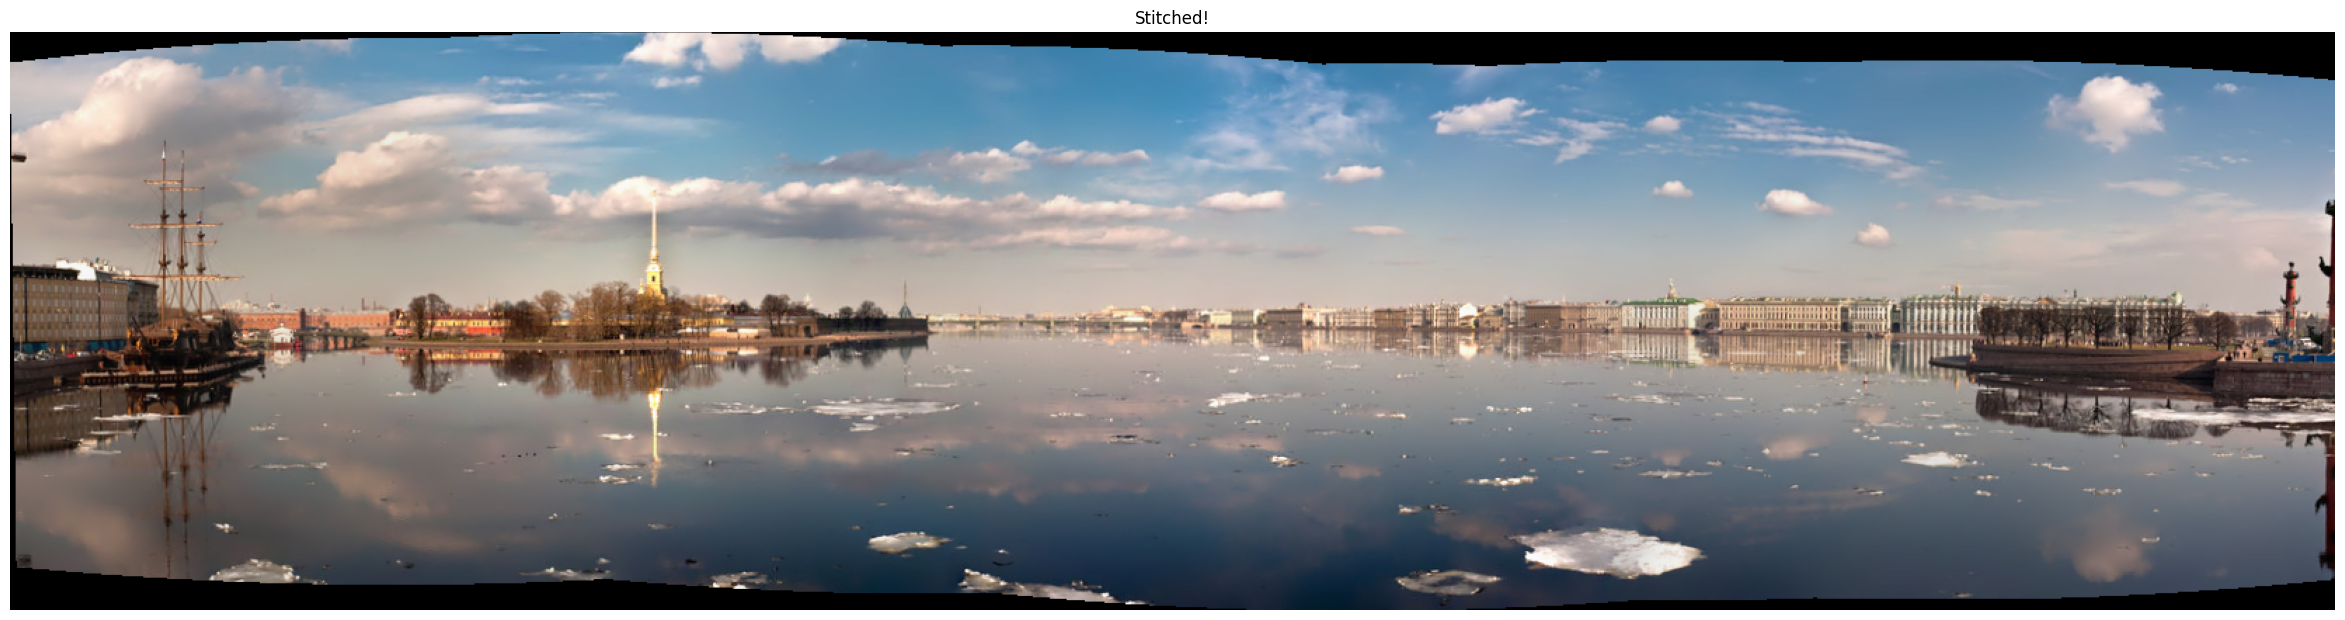

In [2]:
# Import Libraries
import os
import cv2
import math
import glob
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

# Read Images
imagefiles = glob.glob(f"boat{os.sep}*")
imagefiles.sort()

images = []
for filename in imagefiles:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

num_images = len(images)

# Display Images
plt.figure(figsize=[30, 10])
num_cols = 3
num_rows = math.ceil(num_images / num_cols)
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.axis("off")
    plt.imshow(images[i])

# Stitch Images
stitcher = cv2.Stitcher_create()
status, result = stitcher.stitch(images)

if status == 0:
    plt.figure(figsize=[30, 10])
    plt.axis("off")
    plt.imshow(result)
    plt.title('Stitched!')

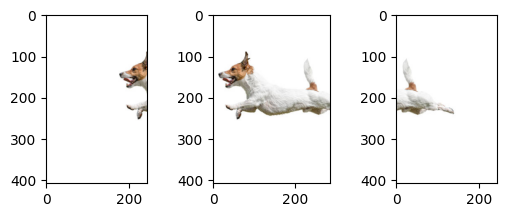

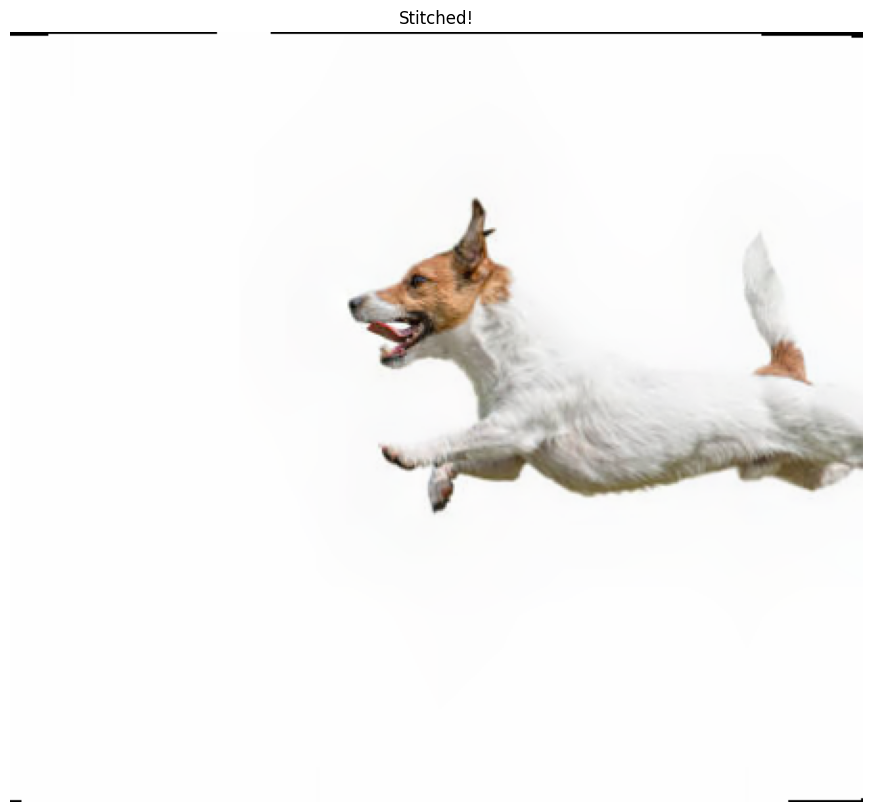

In [11]:
## CROPPING THEN STITCHING ##
import cv2
import math
import glob
import numpy as np
import matplotlib.pyplot as plt

dog = cv2.imread('dog.jpg')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

width = dog.shape[1]
each_width = (int)( width / 3)
height = dog.shape[0]

dogs = []

dog1 = dog[0:height, 0:each_width + 40]
dog2 = dog[0:height, each_width - 40:each_width*2 + 40]
dog3 = dog[0:height, each_width*2 - 40:width]

dogs.append(dog1.copy())
dogs.append(dog2.copy())
dogs.append(dog3.copy())

for i in range(0, 3):
    plt.subplot(2, 3, i + 1)
    plt.imshow(dogs[i])

# Stitch Images
dog_stitcher = cv2.Stitcher_create()
status, result = dog_stitcher.stitch(dogs)

if status != 0:
    print(f"Stitching failed with error code {status}")

if status == 0:
    plt.figure(figsize=[30, 10])
    plt.axis("off")
    plt.imshow(result)
    plt.title('Stitched!')

plt.show()